In [2]:
from Model import RetrainedClassificationModel
from HyperparameterOptimization import findOptimalBatchSize
model = RetrainedClassificationModel('noname')

C:\Users\gango\Documents\Projects\machine learning\Airbus-Ship-Detection-Challenge\Model\RetrainedClassificationModel.py:33: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("fl...)`
  self.model = Model(input=model.input, output=predictions)


In [ ]:
bs = findOptimalBatchSize(model, 64)

In [ ]:
hst = model.train(bs, n_epoch=100)

In [3]:
model.load('tcm.03-0.08.hdf5')

In [6]:
from getABSDData import getABSDDataMask
import cv2
label_converter = lambda x: cv2.resize(x, (model.img_width, model.img_width))
image_converter = lambda x: keras.applications.vgg16.preprocess_input(label_converter(x))
training, dev, _ = getABSDDataMask(1, label_converter=label_converter, image_converter=image_converter, remove_nan=True)

In [42]:
i, m = training[0]

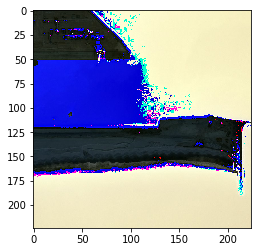

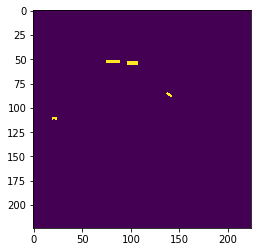

In [43]:
import matplotlib .pyplot as plt
import numpy as np
plt.imshow(i[0, :, :, :].astype(np.uint8))
plt.show()
plt.imshow(m.reshape((224, 224)))
plt.show()

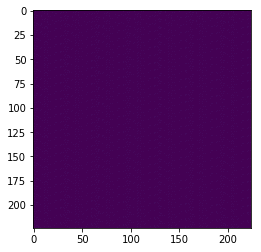

In [47]:
p = model.model.predict(i)
plt.imshow(p.reshape((224, 224))*255)
plt.show()